In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import keras
import numpy as np

Using TensorFlow backend.


In [2]:
data_size = 500

In [3]:
data = np.stack((np.arange(data_size), np.arange(data_size)), axis=-1).astype(np.float64)
data[:10]

array([[ 0.,  0.],
       [ 1.,  1.],
       [ 2.,  2.],
       [ 3.,  3.],
       [ 4.,  4.],
       [ 5.,  5.],
       [ 6.,  6.],
       [ 7.,  7.],
       [ 8.,  8.],
       [ 9.,  9.]])

In [4]:
noise = np.random.rand(data_size, 2)
noise[:,0] *= np.random.randint(200, size=data_size)
noise[:,1] *= np.random.randint(200, size=data_size)
data += noise
data[:10]

array([[   1.72455971,   20.5598229 ],
       [  77.11561806,  178.38625504],
       [  11.9244142 ,   33.61681209],
       [  85.59835681,    4.25072009],
       [  56.41863463,  131.84841467],
       [  44.22795631,   73.05589315],
       [  30.38963863,   90.56265007],
       [  44.45035537,   66.37270683],
       [  14.65516221,  103.42046143],
       [  52.9219555 ,   97.70907649]])

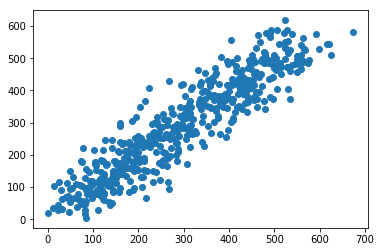

In [5]:
plt.scatter(data[:,0], data[:,1])
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = np.asarray(train_test_split(data[:,0], data[:,1], test_size=0.1))

In [16]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(1, input_shape=(1,), kernel_initializer='uniform', activation='linear'))
model.compile(loss='mse', optimizer='adam')

model.fit(x_train, y_train, epochs=50, batch_size=8, verbose=1)

Epoch 1/50
450/450 [==============================] - 0s 443us/step - loss: 96419.5953
Epoch 2/50
450/450 [==============================] - 0s 257us/step - loss: 85669.2462
Epoch 3/50
450/450 [==============================] - 0s 221us/step - loss: 76006.6792
Epoch 4/50
450/450 [==============================] - 0s 219us/step - loss: 67316.0488
Epoch 5/50
450/450 [==============================] - 0s 244us/step - loss: 59427.0645
Epoch 6/50
450/450 [==============================] - 0s 244us/step - loss: 52313.1420
Epoch 7/50
450/450 [==============================] - 0s 299us/step - loss: 45909.1666
Epoch 8/50
450/450 [==============================] - 0s 293us/step - loss: 40157.7037
Epoch 9/50
450/450 [==============================] - 0s 247us/step - loss: 35041.3054
Epoch 10/50
450/450 [==============================] - 0s 221us/step - loss: 30521.0398
Epoch 11/50
450/450 [==============================] - 0s 275us/step - loss: 26468.5919
Epoch 12/50
450/450 [====================

In [17]:
print(model.evaluate(x_test, y_test, batch_size=1))

50/50 [==============================] - 0s 3ms/step
4537.20114594


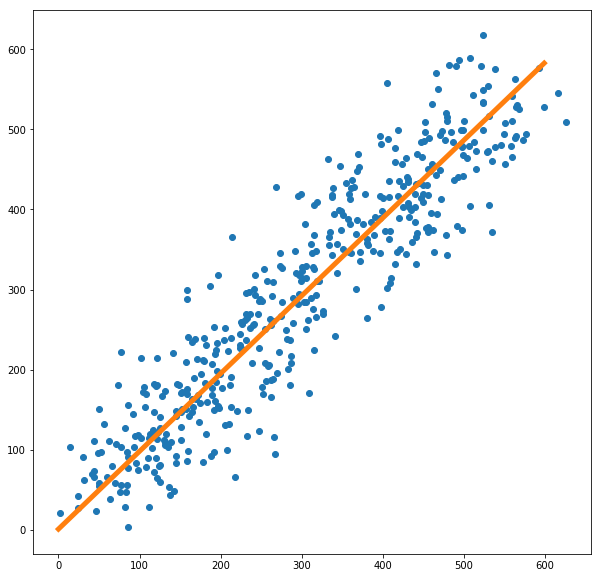

In [19]:
x_line = np.arange(0, 600).reshape(-1,1)
plt.figure(figsize=(10,10))
plt.scatter(x_train, y_train)
plt.plot(x_line, model.predict(x_line), color='C1', linewidth=5.0)
plt.show()